In [1]:
import os

from dotenv import load_dotenv
load_dotenv()

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_groq import ChatGroq

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "{input}")
    ]
)
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))
parser = StrOutputParser()

chain = prompt | llm_obj | parser 

response = chain.invoke(
    {"input": "Is the Earth flat?"}
)
print(response)

No, the Earth is not flat.  The overwhelming scientific evidence and observations confirm that the Earth is an oblate spheroid, meaning it is slightly flattened at the poles and bulging at the equator. Here are some of the key evidence that supports the fact that the Earth is not flat:

1. **Ship disappearing over the horizon**: When a ship sails away from an observer on the shore, it will eventually disappear from view as it sinks below the horizon. This is because the Earth is curved, and the observer's line of sight is gradually lowered as the ship moves further away.
2. **Satellite imagery**: Satellite images of the Earth provide clear visual evidence of its spherical shape. Images taken by satellites in orbit around the Earth show the curvature of the planet, which would not be possible if it were flat.
3. **Shadows on the moon**: During a lunar eclipse, the Earth passes between the sun and the moon, casting a shadow on the lunar surface. The shape of this shadow is curved, indica

In [3]:
'''
chain = prompt | llm | parser followed by chain.invoke({"input": "Is the Earth flat?"}).

The input, which is a dictionary whose key is input and value is the question, 
goes into prompt, of which prompt’s 
output goes into llm, after which llm’s output goes into parser.
'''

'\nchain = prompt | llm | parser followed by chain.invoke({"input": "Is the Earth flat?"}).\n\nThe input, which is a dictionary whose key is input and value is the question, \ngoes into prompt, of which prompt’s \noutput goes into llm, after which llm’s output goes into parser.\n'

In [4]:
# Multiple Inputs 

In [3]:
prompt_with_character = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a {character}. If a trickster, deliberate give the wrong answer. If a sage, give a long philosophical answer."),
        ("human", "{input}")
    ]
)
chain_with_character = prompt_with_character | llm_obj | parser

response = chain_with_character.invoke(
    {
        "input": "Is the Earth flat?",
        "character": "trickster"
    }
)
response

"No, it's definitely round... and upside down. The poles are actually at the equator, and the equator is at the North Pole. Just think about it, when you're standing on the beach, the waves are actually flowing upwards towards the sky, but they're being held back by some invisible force that keeps them from escaping into space. It's a well-known fact that the Earth is a giant, inverted doughnut, and it's held together by a network of invisible strings."

In [6]:
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))
r = llm_obj.invoke("Where is Delhi?")
print(r.content)

Delhi is the capital city of India, located in the northern part of the country. It is situated on the Yamuna River in the National Capital Territory of Delhi (NCT). Delhi is a major urban center and a hub for politics, economy, culture, and tourism in India.


In [4]:
from tavily import TavilyClient

In [8]:
! pip install tavily-python

In [6]:
from tavily import TavilyClient

tavily_client = TavilyClient(api_key="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")
response = tavily_client.search("Where is delhi?")

print(response)

{'query': 'Where is delhi?', 'follow_up_questions': None, 'answer': None, 'images': [], 'results': [{'url': 'https://www.burningcompass.com/on-world-map/where-is-delhi.html', 'title': 'Where is Delhi Located ? - Delhi on World Map - BurningCompass', 'content': 'Delhi is a major metropolitan region in northern India, located on the Indo-Gangetic plains along the western bank of the Yamuna River. Administratively, the', 'score': 0.8790744, 'raw_content': None}, {'url': 'https://www.quora.com/Where-is-Delhi-1', 'title': 'Where is Delhi? - Quora', 'content': 'Delhi is Union territory located in the Northern part of India and is surrounded by Haryana on three sides and by UP on one side. It is neither', 'score': 0.86954874, 'raw_content': None}, {'url': 'https://www.britannica.com/place/Delhi', 'title': 'Delhi | History, Population, Map, & Facts - Britannica', 'content': 'Delhi is a city and national capital territory in north-central India. It consists of two parts: Old Delhi, the historic

In [7]:
import requests
from langchain_core.messages import HumanMessage,AIMessage

In [9]:
search_response = requests.post(
    "https://api.tavily.com/search",
    headers={"Authorization": f"Bearer {os.getenv('TAVILY_API_KEY')}"},
    json={
        "query": "weather in Bangalore today",  # query, 
        "search_depth": "basic", 
        "include_answer": True
    }
)
data = search_response.json()
web_answer = data.get("answer", "No real-time info found.")

query = "What is the weather in Bangalore today?"
prompt = f"{query}.\n Answer based on the following information: {web_answer}"

response = llm_obj.invoke([
    HumanMessage(content=prompt)
])
print(response.content)

It's a lovely day in Bangalore today. The current weather conditions are:

- Sunny: Expect plenty of sunshine today.
- Temperature: A mild 19°C, making it a great day to be outdoors.
- Wind: Coming from the east at 12 mph, which is relatively gentle.
- Humidity: A comfortable 68%, neither too dry nor too humid.

Overall, it's a pleasant day to explore the city, go for a walk, or simply enjoy the outdoors.


In [10]:
prompt = ChatPromptTemplate.from_messages(
    [
        ('system','you are helpful assistant'),
        ('human','i likes to read {mybook} books')
    ]
)
prompt.format_messages(mybook="ruby")

[SystemMessage(content='you are helpful assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='i likes to read ruby books', additional_kwargs={}, response_metadata={})]

In [13]:
# llm_obj.invoke("what is langchain?") --->response --->-- 
# 
# llm_obj.invoke([HumanMessage(content="what is Langchain?"]) ---> AIMessage(content="Langchain is a framework..)

In [11]:
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [12]:
from langchain_core.messages import HumanMessage,AIMessage

In [14]:
llm_obj.invoke([HumanMessage(content="What is Langchain?")]) # same as llm_obj.invoke("Query?")

AIMessage(content="Langchain is an open-source platform that provides a framework for building and integrating large language models (LLMs) into various applications. It was founded in 2022 by David Moore, a well-known developer and researcher in the field of natural language processing (NLP).\n\nThe main goal of Langchain is to enable developers to easily integrate LLMs into their projects, allowing them to build more sophisticated and conversational AI experiences. The platform provides a set of APIs and tools that make it easier to work with LLMs, including:\n\n1. **LLM integration**: Langchain provides pre-built integrations with popular LLMs like LLaMA, BERT, and RoBERTa, making it easy to access their capabilities.\n2. **Conversation flow**: Langchain allows developers to define conversation flows using a simple, intuitive language, making it easier to build complex conversational interfaces.\n3. **Contextual understanding**: Langchain's platform is designed to handle contextual 

In [ ]:
import requests
requests.get(URL - Get the resource) 
requests.post(Create  - Resource - object)
requests.put(URL-Content-object-modification)
requests.delete(URL) # delete the resource

In [15]:
requests.get('https://www.google.com')

<Response [200]>

In [ ]:
client ------>-------request------->--------webserver----->---------process ..
                   ============<===================================
                             WebPage - <html>...{{data}}...</html>
                             Data  - json 

In [16]:
r = requests.get('https://www.google.com')

In [17]:
r.headers

{'Date': 'Wed, 04 Feb 2026 04:28:40 GMT', 'Expires': '-1', 'Cache-Control': 'private, max-age=0', 'Content-Type': 'text/html; charset=ISO-8859-1', 'Content-Security-Policy-Report-Only': "object-src 'none';base-uri 'self';script-src 'nonce-MoF6VD7FR94eZx0O74hpMA' 'strict-dynamic' 'report-sample' 'unsafe-eval' 'unsafe-inline' https: http:;report-uri https://csp.withgoogle.com/csp/gws/other-hp", 'Reporting-Endpoints': 'default="//www.google.com/httpservice/retry/jserror?ei=-MqCadrQBcmQwbkPiZj-oAI&cad=crash"', 'Accept-CH': 'Sec-CH-Prefers-Color-Scheme', 'P3P': 'CP="This is not a P3P policy! See g.co/p3phelp for more info."', 'Content-Encoding': 'gzip', 'Server': 'gws', 'X-XSS-Protection': '0', 'X-Frame-Options': 'SAMEORIGIN', 'Set-Cookie': '__Secure-STRP=AD6Dogs1w6aL3AOQ1N1IyUtt-tjtYOyfOtjKVMGPzvmOtmsvBaDPo8cW_w45c3u5rFToPafGaTo2JjtCBBKoPXhfOIWg5wPjhA; expires=Wed, 04-Feb-2026 04:33:40 GMT; path=/; domain=.google.com; Secure; SameSite=strict, AEC=AaJma5tpN6FNgZ3T1Hh7gyhfKnozGScAmwEQux2IZ6A

In [18]:
r.headers['Content-Type']

'text/html; charset=ISO-8859-1'

In [20]:
web_page = r.text
print(type(web_page),len(web_page))

<class 'str'> 19774


In [21]:
r = requests.get("https://api.github.com/users/hadley/orgs")
r.headers

{'Date': 'Wed, 04 Feb 2026 04:39:59 GMT', 'Content-Type': 'application/json; charset=utf-8', 'Cache-Control': 'public, max-age=60, s-maxage=60', 'Vary': 'Accept,Accept-Encoding, Accept, X-Requested-With', 'ETag': 'W/"61f25e2a55611f7eaf75a20ed5fe501245c5af99bc383854f5442975318fad26"', 'X-GitHub-Media-Type': 'github.v3; format=json', 'x-github-api-version-selected': '2022-11-28', 'Access-Control-Expose-Headers': 'ETag, Link, Location, Retry-After, X-GitHub-OTP, X-RateLimit-Limit, X-RateLimit-Remaining, X-RateLimit-Used, X-RateLimit-Resource, X-RateLimit-Reset, X-OAuth-Scopes, X-Accepted-OAuth-Scopes, X-Poll-Interval, X-GitHub-Media-Type, X-GitHub-SSO, X-GitHub-Request-Id, Deprecation, Sunset', 'Access-Control-Allow-Origin': '*', 'Strict-Transport-Security': 'max-age=31536000; includeSubdomains; preload', 'X-Frame-Options': 'deny', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '0', 'Referrer-Policy': 'origin-when-cross-origin, strict-origin-when-cross-origin', 'Content-Security

In [22]:
r.headers['Content-Type']

'application/json; charset=utf-8'

In [23]:
r.json()

[{'login': 'ggobi',
  'id': 423638,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjQyMzYzOA==',
  'url': 'https://api.github.com/orgs/ggobi',
  'repos_url': 'https://api.github.com/orgs/ggobi/repos',
  'events_url': 'https://api.github.com/orgs/ggobi/events',
  'hooks_url': 'https://api.github.com/orgs/ggobi/hooks',
  'issues_url': 'https://api.github.com/orgs/ggobi/issues',
  'members_url': 'https://api.github.com/orgs/ggobi/members{/member}',
  'public_members_url': 'https://api.github.com/orgs/ggobi/public_members{/member}',
  'avatar_url': 'https://avatars.githubusercontent.com/u/423638?v=4',
  'description': ''},
 {'login': 'rstudio',
  'id': 513560,
  'node_id': 'MDEyOk9yZ2FuaXphdGlvbjUxMzU2MA==',
  'url': 'https://api.github.com/orgs/rstudio',
  'repos_url': 'https://api.github.com/orgs/rstudio/repos',
  'events_url': 'https://api.github.com/orgs/rstudio/events',
  'hooks_url': 'https://api.github.com/orgs/rstudio/hooks',
  'issues_url': 'https://api.github.com/orgs/rstudio/issues',
  'mem

In [24]:
from langchain_core.messages import HumanMessage,AIMessage

In [26]:
llm_obj.invoke([HumanMessage(content="Hello my name is Karthik I am instructor")]) # same as llm_obj.invoke("Query?")

AIMessage(content="Hello Karthik, nice to meet you. You're an instructor, that's great. What subject or field do you teach? Are you looking for any assistance or would you like to discuss something specific?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 45, 'total_tokens': 88, 'completion_time': 0.064715209, 'prompt_time': 0.002130878, 'queue_time': 0.045219822, 'total_time': 0.066846087}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c26fb-fb6d-7652-a0a4-c736cf48fb5c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 45, 'output_tokens': 43, 'total_tokens': 88})

In [27]:
llm_obj.invoke([HumanMessage(content="Hi Tell me my name?")]) # same as llm_obj.invoke("Query?")

AIMessage(content="I don't have any information about your name. I'm a large language model, I don't have the ability to store or retain personal information about individual users, including their names. Each time you interact with me, it's a new conversation. If you'd like to share your name with me, I'd be happy to chat with you and address you by name!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 76, 'prompt_tokens': 41, 'total_tokens': 117, 'completion_time': 0.102652348, 'prompt_time': 0.001926423, 'queue_time': 0.045630333, 'total_time': 0.104578771}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c26fc-631a-7643-9bf5-cff805e9dca0-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 76, 'total_tokens': 117})

In [ ]:
+-------------------------------
| UserQ:  What is python?
| AI:  ....
| UserQ: list out any 5 important features?
| AI: .. there are 5 important python features..
|        .... ....
|
+----------------------------------

+--------------------------
| User: Hello my name is Tom renewal my website domain...
| AI: Hello Tom....mynmae is userA ...
| User: renewal my website ...
| AI : Enter your website domain name?
| User: 
---------------------------------------//session expired 
|
| User: I will type website name ->www.abc.com
| AI : I userB from ISP provider ...


 +------------------------------------------------------------+
 | sessionID               |  Chat(Human+AI)                  |
 |-------------------------|----------------------------------|
 | session1                | User: ...
 |                         | AI_response:
 |                         | User:
 |                         | AI_reponse
 --------------------------------------------------------------
 | session2                | User: ...
 |                         |
 |                         |
 ---------------------------------------------------------------

In [28]:
stores = {}
stores['p101'] = 'pA'
stores['p102'] = 'pB'
stores['p103'] = 'pC'
stores

{'p101': 'pA', 'p102': 'pB', 'p103': 'pC'}

In [29]:
stores={}
stores['p101'] = ['pA',1000,'pVendor1']
stores['p102'] = ['pB',2000,'pVendor2']
stores['p103'] = ['pC',3000,'pVendor3']
stores

{'p101': ['pA', 1000, 'pVendor1'],
 'p102': ['pB', 2000, 'pVendor2'],
 'p103': ['pC', 3000, 'pVendor3']}

In [30]:
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [31]:
chat_history = {}

def f1(session_id: str) -> BaseChatMessageHistory:
    if session_id not in chat_history:
        chat_history[session_id] = ChatMessageHistory()
    return chat_history[session_id]

obj = RunnableWithMessageHistory(llm_obj,f1)

In [32]:
my_config={"configurable":{"session_id":"chat-1"}}
obj.invoke([HumanMessage(content="Hello my name is Karthik I am instructor")],config=my_config)

AIMessage(content="Nice to meet you, Karthik. As an instructor, I'm here to help you with any questions or topics you'd like to discuss. What subject or area would you like to focus on today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 45, 'total_tokens': 88, 'completion_time': 0.074003574, 'prompt_time': 0.002687624, 'queue_time': 0.046701036, 'total_time': 0.076691198}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c2711-4070-75c3-999d-258503978d6f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 45, 'output_tokens': 43, 'total_tokens': 88})

In [33]:
obj.invoke([HumanMessage(content="Hi Tell me my name?")],config=my_config)

AIMessage(content='Your name is Karthik.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 103, 'total_tokens': 111, 'completion_time': 0.005253969, 'prompt_time': 0.006212986, 'queue_time': 0.046431571, 'total_time': 0.011466955}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c2711-be5e-7493-9b97-1e4362d37ff9-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 103, 'output_tokens': 8, 'total_tokens': 111})

In [ ]:
system prompt - 500
rule          - 1000
chathistory   - 10,000
FAISS         - 2000
tool output   - 3000
userQuery     - 100
model answer ->  2000 <===
----------------------------
                  18600

user query token limit 
model response token limit 



In [34]:
my_config={"configurable":{"session_id":"chat-2"}}
obj.invoke([HumanMessage(content="Hi Tell me my name?")],config=my_config)

AIMessage(content="I don't have information about your name, as our conversation just started. I'm a large language model, I don't have personal interactions or retain knowledge about individual users. If you'd like to share your name, I can use it to personalize our conversation.", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 41, 'total_tokens': 95, 'completion_time': 0.088773353, 'prompt_time': 0.002885346, 'queue_time': 0.04712566, 'total_time': 0.091658699}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c2721-6c8c-7a72-972f-4e6b38369f3b-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 41, 'output_tokens': 54, 'total_tokens': 95})

In [35]:
chat_history

{'chat-1': InMemoryChatMessageHistory(messages=[HumanMessage(content='Hello my name is Karthik I am instructor', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Karthik. As an instructor, I'm here to help you with any questions or topics you'd like to discuss. What subject or area would you like to focus on today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 45, 'total_tokens': 88, 'completion_time': 0.074003574, 'prompt_time': 0.002687624, 'queue_time': 0.046701036, 'total_time': 0.076691198}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c2711-4070-75c3-999d-258503978d6f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 45, 'output_tokens': 43, 'total_tokens': 88}), HumanMessage(content='Hi Tell me my name?', additional_kwargs={}

In [36]:
obj

RunnableWithMessageHistory(bound=RunnableBinding(bound=RunnableBinding(bound=RunnableLambda(_enter_history), kwargs={}, config={'run_name': 'load_history'}, config_factories=[])
| RunnableBinding(bound=RunnableLambda(_call_runnable_sync), kwargs={}, config={'run_name': 'check_sync_or_async'}, config_factories=[]), kwargs={}, config={'run_name': 'RunnableWithMessageHistory'}, config_factories=[]), kwargs={}, config={}, config_factories=[], get_session_history=<function f1 at 0x000001E16F43AA20>, history_factory_config=[ConfigurableFieldSpec(id='session_id', annotation=<class 'str'>, name='Session ID', description='Unique identifier for a session.', default='', is_shared=True, dependencies=None)])

In [37]:
my_config={"configurable":{"session_id":"chat-1"}}
obj.invoke([HumanMessage(content="Explain what is langchain in one line?")],config=my_config)

AIMessage(content='LangChain is an open-source Python library that allows developers to build, train, and deploy large language models and AI applications.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 130, 'total_tokens': 156, 'completion_time': 0.064307884, 'prompt_time': 0.008112408, 'queue_time': 0.045344339, 'total_time': 0.072420292}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_1151d4f23c', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c2723-96e7-7030-b74d-55962c70a154-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 130, 'output_tokens': 26, 'total_tokens': 156})

In [38]:
chat_history['chat-1']

InMemoryChatMessageHistory(messages=[HumanMessage(content='Hello my name is Karthik I am instructor', additional_kwargs={}, response_metadata={}), AIMessage(content="Nice to meet you, Karthik. As an instructor, I'm here to help you with any questions or topics you'd like to discuss. What subject or area would you like to focus on today?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 45, 'total_tokens': 88, 'completion_time': 0.074003574, 'prompt_time': 0.002687624, 'queue_time': 0.046701036, 'total_time': 0.076691198}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c2711-4070-75c3-999d-258503978d6f-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 45, 'output_tokens': 43, 'total_tokens': 88}), HumanMessage(content='Hi Tell me my name?', additional_kwargs={}, response_

In [ ]:
# Step-1 Load pdf file

# Step-2 Split the docs - chunks - RecursiveCharacterTextSplitter

# Step-3 embedding object

# Step-4  VectorDB

# Step-5 Retrieval object

# Step-6 LLM object

## Step-7 Prompt with History
ChatPromptTemplate.form_template("""
user following context and chat history to answer the question
chat history:
{history}
Context:
{context}
Question:
{query}
""")
# Step 8: QAChain RetrievalQA

# Step 9: Chat history
chat_history = {}

def f1(session_id: str) -> BaseChatMessageHistory:
    if session_id not in chat_history:
        chat_history[session_id] = ChatMessageHistory()
    return chat_history[session_id]

obj = RunnableWithMessageHistory(llm_obj,f1,input_messages_key="query",history_messages_key="history")

# Step 10: Create session ID 
session_id="session-1"
query1="...."

# Step 11: user query
obj.invoke({"query":..},config={"configurable":{"session":session_id})

In [40]:
# dynamically insert a message - at runtime
from langchain_core.prompts import ChatPromptTemplate,MessagesPlaceholder
#help(ChatPromptTemplate)

ChatPromptTemplate.from_messages([
("system","You are helpful assistant"), <== fixed 
MessagesPlaceholder(variable_name="chat_history"),
                                     |<-- dynamically list of messages 
])


In [41]:
from langchain_core.prompts import ChatPromptTemplate,MessagesPlaceholder

In [42]:
prompt = ChatPromptTemplate.from_messages([
    ("system","You are helpful assistant. Answer all the question in {language}."),
    MessagesPlaceholder(variable_name="question")])

In [43]:
chain = prompt|llm_obj

In [45]:
response = chain.invoke({'question':[HumanMessage(content="Hello my name is Tom")],"language":"french"})
print(response)

content="Bonjour Tom, enchanté ! Comment puis-je vous aider aujourd'hui ?" additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 52, 'total_tokens': 69, 'completion_time': 0.025218989, 'prompt_time': 0.002478203, 'queue_time': 0.045736143, 'total_time': 0.027697192}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_4387d3edbb', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019c2732-645c-7100-976d-cc2b29427d34-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 52, 'output_tokens': 17, 'total_tokens': 69}


In [46]:
print(response.content)

Bonjour Tom, enchanté ! Comment puis-je vous aider aujourd'hui ?


In [48]:
response = chain.invoke({'question':[HumanMessage(content="Hello my name is Tom")],"language":"hindi"})
print(response.content)

नमस्ते टॉम, मैं आपकी सहायता के लिए यहाँ हूँ। क्या मैं आपकी किसी समस्या या प्रश्न का समाधान कर सकता हूँ?


In [49]:
response = chain.invoke({'question':[HumanMessage(content="Hello my name is Tom")],"language":"telugu"})
print(response.content)

నమస్కారం టాం. నేను సహాయకుడిని అనుకుంటున్నాను. ఏ ప్రశ్నలకు సహాయం చేయాలని అడగండి.


In [50]:
response = chain.invoke({'question':[HumanMessage(content="Hello my name is Tom")],"language":"tamil"})
print(response.content)

வணக்கம்! நான் உங்களுக்கு உதவுவதில் நல்ல ஆசை. நீங்கள் தமிழ்நாட்டில் இருந்து அல்லவா என்று அறிந்து கொள்ள வேண்டுமா? உங்கள் பெயர் 'டாம்' என்று சொல்லுகிறீர்கள்.


In [51]:
response = chain.invoke({'question':[HumanMessage(content="Hello my name is Tom")],"language":"kannada"})
print(response.content)

ನಮಸ್ಕಾರ Tom, ನೀವು ಯಾವ ಭಾಷೆಯಲ್ಲಿ ಗುರುತಿಸಿಕೊಳ್ಳಬೇಕು ಎಂಬುದರ ಬಗ್ಗೆ ನಿಮಗೆ ಹೇಳಲು ಬೇಕು?


In [ ]:
###################

In [84]:
import langchain
langchain.__version__

'1.2.7'

In [53]:
from langchain_community.document_loaders import PyPDFLoader
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.vectorstores import FAISS
from langchain_huggingface import HuggingFaceEmbeddings
from langchain_groq import ChatGroq
from langchain_classic.chains import RetrievalQA
from langchain_core.prompts import PromptTemplate
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory

In [72]:
# step 1 Load the data
loader = PyPDFLoader("attention.pdf")
documents = loader.load()

# step 2 split - chunks
text_splitter = RecursiveCharacterTextSplitter()
docs = text_splitter.split_documents(documents)

# step 3 embedding object
embeddings = HuggingFaceEmbeddings(model="sentence-transformers/all-MiniLM-L6-v2")

# step 4 stores to vectordb
vectorstore  = FAISS.from_documents(docs,embeddings)

# step 5 create retrievalobject
retriever_obj = vectorstore.as_retriever()

# step 6 create llm object
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv("GROQ_API_KEY"))

# step 7 prompt - Strict prompt - Strict RAG
my_prompt = PromptTemplate(
    input_variables=["context","question","history"],
    template="""
    You are a strict retrieval QA assistant.
    user following context and chat history to answer the question
    if the answer is not present in the context and history reply exactly with:
    "I don't know, the document doesnot contain this information."
    Context:
    {context}
    Chat history:
    Question:
    {question}
    Answer:
    """
)

# step 8: QAChain
rag_chain = RetrievalQA.from_chain_type(llm = llm_obj,
                                        retriever=retriever_obj,
                                        chain_type_kwargs={"prompt":my_prompt})

In [73]:

# Step 9: Chat history
chat_history = {}

def f1(session_id: str) -> BaseChatMessageHistory:
    if session_id not in chat_history:
        chat_history[session_id] = ChatMessageHistory()
    return chat_history[session_id]

obj = RunnableWithMessageHistory(rag_chain,f1,input_messages_key="query",history_messages_key="history")


In [74]:
#  Step 10: Create session ID 
session_id="session-1"
query1="what is attention in transformer?"

In [76]:
#rag_chain
#obj

RetrievalQA(verbose=False, combine_documents_chain=StuffDocumentsChain(verbose=False, llm_chain=LLMChain(verbose=False, prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='\n    You are a strict retrieval QA assistant.\n    user following context and chat history to answer the question\n    if the answer is not present in the context and history reply exactly with:\n    "I don\'t know, the document doesnot contain this information."\n    Context:\n    {context}\n    Chat history:\n    Question:\n    {question}\n    Answer:\n    '), llm=ChatGroq(profile={'max_input_tokens': 131072, 'max_output_tokens': 8192, 'image_inputs': False, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True}, client=<groq.resources.chat.completions.Completions object at 0x000001E17BBB68B0>, async_client=<groq.resources.chat.completions.AsyncC

In [77]:
# Step 11: user query
response = obj.invoke({"query":query1},config={"configurable":{"session_id":session_id}})
print(response)

{'query': 'what is attention in transformer?', 'history': [], 'result': 'An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum of the values. This is achieved by computing the similarity between the query and each key, and then using these similarities to compute the weights. The weighted sum of the values is then computed using these weights. \n\nIn the context of the Transformer model, attention is used in three different ways:\n\n1. In "encoder-decoder attention" layers, the queries come from the previous decoder layer, and the memory keys and values come from the output of the encoder. This allows every position in the decoder to attend over all positions in the input sequence.\n2. The encoder contains self-attention layers. In a self-attention layer all of the keys, values and queries come from the same place, in this case, the output o

In [78]:
query2="Explain again?"
response = obj.invoke({"query":query2},config={"configurable":{"session_id":session_id}})
print(response)

{'query': 'Explain again?', 'history': [HumanMessage(content='what is attention in transformer?', additional_kwargs={}, response_metadata={}), AIMessage(content='An attention function can be described as mapping a query and a set of key-value pairs to an output, where the query, keys, values, and output are all vectors. The output is computed as a weighted sum of the values. This is achieved by computing the similarity between the query and each key, and then using these similarities to compute the weights. The weighted sum of the values is then computed using these weights. \n\nIn the context of the Transformer model, attention is used in three different ways:\n\n1. In "encoder-decoder attention" layers, the queries come from the previous decoder layer, and the memory keys and values come from the output of the encoder. This allows every position in the decoder to attend over all positions in the input sequence.\n2. The encoder contains self-attention layers. In a self-attention layer

Text(1, 50, 'data1')

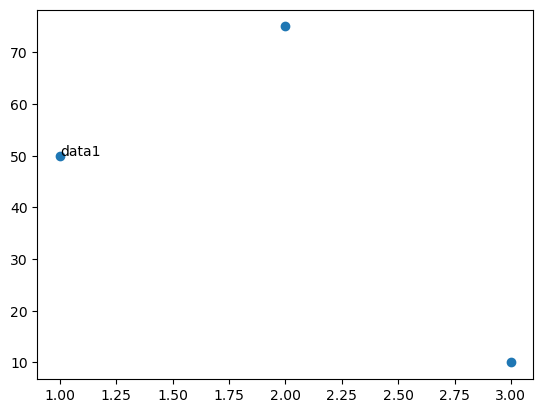

In [83]:
import matplotlib.pyplot as plt
plt.scatter([1,2,3],[50,75,10])
plt.text(1,50,"data1")

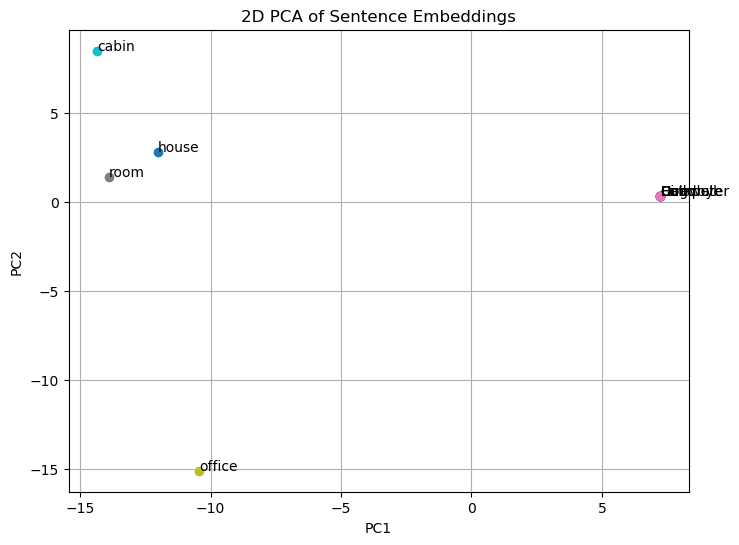

In [86]:
from langchain_community.embeddings import OllamaEmbeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Get embeddings for multiple queries
embedding = OllamaEmbeddings(model='nomic-embed-text:latest')


sentences = ["Hello", "Hi", "Goodbye", "Farewell", "Dog", "Cat", "Computer","room","office",
             "cabin","house"]
vectors = [embedding.embed_query(s) for s in sentences]

# Reduce to 2D
pca = PCA(n_components=2)
reduced = pca.fit_transform(vectors)

# Plot
plt.figure(figsize=(8, 6))
for i, point in enumerate(reduced):
    plt.scatter(point[0], point[1])
    plt.text(point[0]+0.01, point[1]+0.01, sentences[i])
plt.title("2D PCA of Sentence Embeddings")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [ ]:
ReAct
Thought  -- LLM  - current state of problem
|
Action ---tool --- based on the thought --- decides which tool to invoke 
| 
Observation 
     |--> the result returned by the tool after execution
     |--> OK | loop ---- // edge: tool -- reason 
|         | --> conditional edge ->END
Final Answer 

End_User: Query ---->     |  AI Appln  |
               ---<---    |  ReAct |   
               Final Result
tool logic code --- user defined function
State --- user defined class
         

In [ ]:

[dataSet] - 2025 - batch data - stored data
  +
 LLM - 2023
  +
 RAG
   |----Q: what is latest langchain version ?
    --->A1: from dataset  --->as per your dataset Langchain 0.2.3
    --->A2: from llm (pre-trained)    --->--> langchain 0.7.4
 =======================================================// ReAct is not required

### Vs
[dataSet] - 2025 - batch data - stored data
  +
 LLM - 2023
  +
 RAG
   |----Q: What is latest langchain version - feb 2026 - current version /latest info 
    --->A1: from dataset                                                    |---> Tool -- connect with external
    --->A2: from llm (pre-trained)   
    ---
 =======================================================// ReAct required


User -> Reason ->tool ->observation ->Reason ->... Answer 
        |______________________________________|

###
ReAct
 |-->decide when to use tool
 |--> use tool outputs as new context

ReAct
Thought/Reason  --------------> reason node

Action -----------------------> tool node

Observation -----------------> tool result in current state or not -- node 

Loop ----------------------------> edge:tool ---> reason

Stop  ----------------------------> END

ReAct 
-> ReAct state  
  state = {
       "messages" : [] 
  }
 ------------------//schema 

-> Reason node
    --> LLM sees the user query 
        |
       Reason -->Action(decision)

  if "search/latest/.." in message:
        go to tool node (Action)

--> Tool node 
     -->Runs --->execute --->result //Observation

--> Loop back to reason 
     ....
 --> END 

In [ ]:
while True:
    thought = llm(messages)
    if thought -->use tool:
        observation = tool.run()
        messages.append(observation)
    else:
        Answer ->OK
        break

In [88]:
from typing import TypedDict,Annotated
#help(Annotated)


In [89]:
[1,2]+[3,4]

[1, 2, 3, 4]

In [ ]:
# What are the free llm available from groq as 2026 records 

In [ ]:
# import all libs

# Tools 

# LLm 

# State schema

### Nodes 
    node1 - reason_node
    node2 - tool_node
    node3 - decision_node - based on the condition

# Build Graph
     add_node - reason_node
     add_node - tool_node
     set entry point - reason 
     add conditional_edge 
         reason
         decision_node
                  if observation:
                       tool
                  else:
                        END

    add_edge(tool,reason) # loop

    app = graph.compile()
    app.invoke({})  -->Final Output
                |__ arguments - follow the schema 

In [96]:
from typing import TypedDict,Annotated
from langgraph.graph import StateGraph,END
from langchain_groq import ChatGroq
from langchain_community.tools import DuckDuckGoSearchRun
import operator
from langchain_core.messages import HumanMessage,AIMessage

In [97]:
class AgentState(TypedDict):
    messages: Annotated[list,operator.add]
    tool_result: str

In [98]:
search_tool = DuckDuckGoSearchRun()
llm_obj = ChatGroq(model="llama-3.1-8b-instant",api_key=os.getenv('GROQ_API_KEY'))

In [100]:
## Nodes

def reason_node(state: AgentState):
    msgs = state["messages"]
    response = llm_obj.invoke(msgs)
    return {"messages":[response]}

def tool_node(state: AgentState):
    last_msg = state["messages"][-1].content

    query = last_msg.replace("SEARCH","").strip() # To invoke tool execution 
    result = search_tool.run(query)
    tool_msg = AIMessage(content=f"Tool result:\n{result}")
    return {"tool_result": result,"messages":[tool_msg]}

def decide_next(state: AgentState):
    ''' conditional edge - decide if tool is required'''
    last = state['messages'][-1].content
    if "SEARCH" in last:
        return "tool"
    else:
        return "end"

graph = StateGraph(AgentState)

graph.add_node("reason",reason_node)
graph.add_node("tool",tool_node)

graph.set_entry_point("reason")

graph.add_conditional_edges(
    "reason",
    decide_next,
    {
        "tool": "tool",
        "end": END
    }
)
        
graph.add_edge("tool","reason")
app = graph.compile()

## Run 
question="What are the free llm models areavailable from groq as 2026 records"
initialize = {"messages":[HumanMessage(content=question)],"tool_result": ""}

output = app.invoke(initialize)
print(output)

{'messages': [HumanMessage(content='What are the free llm models areavailable from groq as 2026 records', additional_kwargs={}, response_metadata={}), AIMessage(content="As of my knowledge cutoff in 2023, Groq provides several free LLM (Large Language Model) models. However, please note that the availability and details of these models may have changed since my knowledge cutoff date. Here are some of the free LLM models available from Groq as of 2023:\n\n1. **Groq T0**: A 1.1B parameter model based on the T5 architecture. It's designed for general-purpose text processing tasks like text generation, question answering, and text classification.\n2. **Groq T5**: A 220M parameter model based on the T5 architecture. It's suitable for tasks like text classification, sentiment analysis, and question answering.\n3. **Groq BART**: A 160M parameter model based on the BART architecture. It's designed for tasks like text summarization, text generation, and text classification.\n4. **Groq BERT**: A

In [102]:
print(output['messages'][-1].content)

As of my knowledge cutoff in 2023, Groq provides several free LLM (Large Language Model) models. However, please note that the availability and details of these models may have changed since my knowledge cutoff date. Here are some of the free LLM models available from Groq as of 2023:

1. **Groq T0**: A 1.1B parameter model based on the T5 architecture. It's designed for general-purpose text processing tasks like text generation, question answering, and text classification.
2. **Groq T5**: A 220M parameter model based on the T5 architecture. It's suitable for tasks like text classification, sentiment analysis, and question answering.
3. **Groq BART**: A 160M parameter model based on the BART architecture. It's designed for tasks like text summarization, text generation, and text classification.
4. **Groq BERT**: A 110M parameter model based on the BERT architecture. It's suitable for tasks like text classification, sentiment analysis, and question answering.
5. **Groq RoBERTa**: A 110M

In [106]:
## Nodes

def reason_node(state: AgentState):
    msgs = state["messages"]
    response = llm_obj.invoke(msgs)
    return {"messages":[response]}

def tool_node(state: AgentState):
    last_msg = state["messages"][-1].content

    query = last_msg.replace("SEARCH","").strip() # To invoke tool execution 
    result = search_tool.run(query)
    tool_msg = AIMessage(content=f"Tool result:\n{result}")
    return {"tool_result": result,"messages":[tool_msg]}

def decide_next(state: AgentState):
    ''' conditional edge - decide if tool is required'''
    last = state['messages'][-1].content
    if "SEARCH" in last:
        return "tool"
    else:
        return "end"

graph = StateGraph(AgentState)

graph.add_node("reason",reason_node)
graph.add_node("tool",tool_node)

graph.set_entry_point("reason")

graph.add_conditional_edges(
    "reason",
    decide_next,
    {
        "tool": "tool",
        "end": END
    }
)
        
graph.add_edge("tool","reason") # Tool -->Reason  - Loop edge
app = graph.compile()


## Run 
question="SEARCH latest python version"
initialize = {"messages":[HumanMessage(content=question)],"tool_result": ""}

output = app.invoke(initialize)
print(output['messages'][-1].content)

As of my knowledge cutoff in 2023, the latest version of Python is 3.11. However, please note that new versions of Python are released regularly, so you should check the official Python website for the most up-to-date information.

To check the latest version of Python, you can visit the official Python website at: https://www.python.org/downloads/

Alternatively, you can use the following command in your terminal or command prompt to check the latest version of Python:

```bash
python -V
```

or

```bash
python3 -V
```

This will print the version of Python that is installed on your system.

If you want to install the latest version of Python, you can use a package manager like pip (Python's package installer):

```bash
pip install --upgrade python
```

or

```bash
pip3 install --upgrade python
```

Note: This will upgrade the Python installation on your system. However, if you have multiple versions of Python installed, this may not install the latest version for all versions.


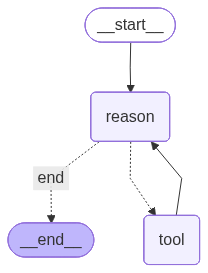

In [105]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
## Home About Blogs contactus  -- V1.0
   .............

Site is running V1.0 

# after 3 months 

## Home About service Blogs contatus 
              -------

       ...
       [CityNews]
        ..

decorator desgin --- adding new features to an existing code 

def decoratorFunction(newFeature):
     def wrapperFunction(*args,**kwargs):
         newFeature()
     return newFeature

def newPage1():
    ....
newPage1 = decoratorFunction(newPage1)
newPage1()
|
same as
|
@decoratorFunction
def newPage1():
    ....

@decoratorFunction
def newPage2():
    ...